In [56]:
import os

if os.path.exists('requirements.txt'):
    !pip3 install -r requirements.txt
else:
    !pip3 install pandas seaborn scikit-learn xgboost
    !pip3 freeze > requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Mercedes-Benz Greener Manufacturing Dataset

This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.

The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.

### File descriptions

Variables with letters are categorical. Variables with 0/1 are binary values.

- train.csv - the training set
- test.csv - the test set, you must predict the 'y' variable for the 'ID's in this file
- sample_submission.csv - a sample submission file in the correct format

In [58]:
df_train = pd.read_csv('./data/train.csv').drop(columns=['ID'])
df_train.sample(30)

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
2583,99.49,z,b,m,c,d,m,g,r,0,...,0,0,1,0,0,0,0,0,0,0
1450,97.47,h,r,ae,e,d,ac,h,k,0,...,1,0,0,0,0,0,0,0,0,0
2923,89.37,y,aa,ai,c,d,p,d,f,0,...,1,0,0,0,0,0,0,0,0,0
879,109.39,ak,l,as,f,d,ag,a,i,0,...,0,0,0,0,0,0,0,0,0,0
3013,105.70,ap,l,s,c,d,q,d,h,0,...,0,0,0,0,0,0,0,0,0,0
1223,107.35,ak,w,ae,d,d,ab,g,j,0,...,0,1,0,0,0,0,0,0,0,0
3565,114.71,af,s,as,c,d,r,c,n,0,...,0,0,1,0,0,0,0,0,0,0
2411,107.30,ak,l,as,f,d,n,i,v,0,...,0,0,0,0,0,0,0,0,0,0
1523,86.83,s,aa,as,c,d,ad,c,n,0,...,1,0,0,0,0,0,0,0,0,0
2841,101.90,z,b,a,a,d,p,j,a,0,...,0,1,0,0,0,0,0,0,0,0


In [59]:
len(df_train.columns)

377

In [60]:
df_train.describe()

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
# Check for missing values
df_train.isna().sum().sum()

0

In [62]:
df_train.dtypes.value_counts()

int64      368
object       8
float64      1
Name: count, dtype: int64

In [63]:
cols_to_dummy = list(df_train.select_dtypes(include='object').columns)
cols_to_dummy

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

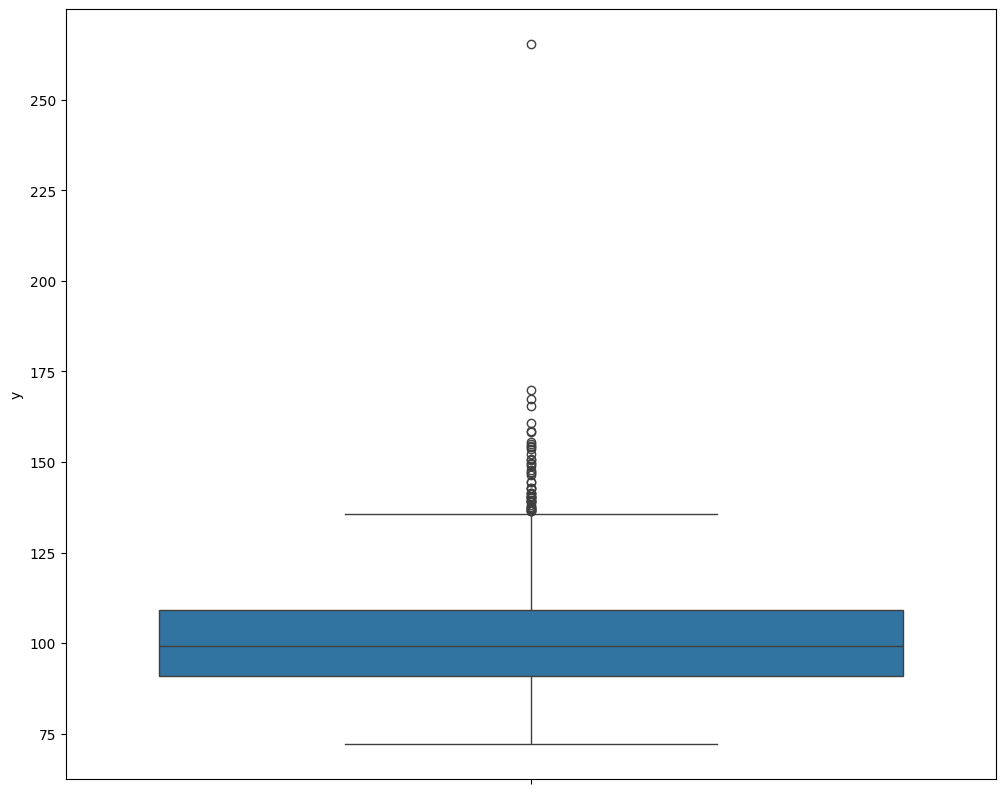

In [64]:
def plot_boxplot(df, cols):
    for col in cols:
        plt.figure(figsize=(12, 10))
        sns.boxplot(df[col])
        plt.show()

plot_boxplot(df_train, ['y'])

In [65]:
def remove_outliers(df: pd.DataFrame, col: str) -> pd.DataFrame:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return df.copy(deep=True)[(df[col] > lower_bound) & (df[col] < upper_bound)]

filtered_df_train = remove_outliers(df_train, 'y')
filtered_df_train['y'].describe()

count    4159.000000
mean      100.096163
std        11.436140
min        72.110000
25%        90.780000
50%        98.970000
75%       108.820000
max       135.530000
Name: y, dtype: float64

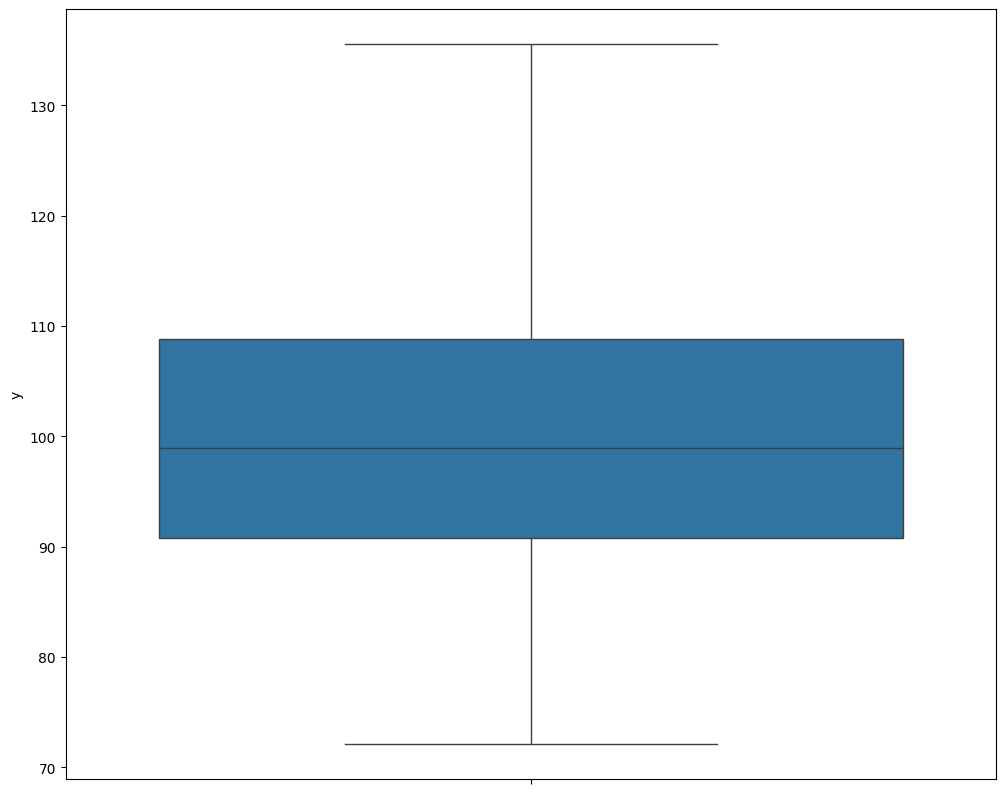

In [66]:
plot_boxplot(filtered_df_train, ['y'])

In [67]:
filtered_df_train = pd.get_dummies(df_train, columns=cols_to_dummy).astype('int')
filtered_df_train.head()

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,130,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,88,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,76,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
filtered_df_train.sample(30)

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
2288,90,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2297,119,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3513,105,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1636,98,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1156,88,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,91,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1663,100,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1384,87,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
577,107,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2715,92,0,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [69]:
non_variable_cols = [
    col for col in filtered_df_train.columns if filtered_df_train[col].nunique() == 1
]
non_variable_cols

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [70]:
filtered_df_train = filtered_df_train.drop(columns=non_variable_cols)
filtered_df_train.head()

,y,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,130,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,88,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,76,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,80,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,78,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
if not os.path.exists('./outputs'):
    os.makedirs('./outputs')

filtered_df_train.to_csv('./outputs/train_clean.csv', index=False)